# 

In [1]:
import tensorflow as tf
print(tf.__version__)


2.0.0-dev20190213


# work: model  9 10

In [2]:
#tf.enable_eager_execution()

In [3]:
tf.executing_eagerly()


True

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pydot_ng
%matplotlib inline

In [5]:
import mpld3
mpld3.enable_notebook()

In [6]:
data_dir = r'D:\python_code\data\stock\^NYA'
fname = os.path.join(data_dir, 'NYA 1981 2018 technical_custom_loss4.csv')
df = pd.read_csv(fname)
df['Date'] = pd.to_datetime(df["Date"])
df_idx = df.set_index(["Date"], drop=True)
df_idx.head(5)

Close  vex_sign  cave_sign   <Open>   <High>   <Low>   <Volume>  \
Date                                                                           
1981-01-02  827.50         0          0   827.50   827.50  827.50          0   
1981-01-05  836.17         0          1   836.17   836.17  836.17          0   
1981-01-06  836.81         0          1   836.81   836.81  836.81          0   
1981-01-07  817.24         1          0   817.24   817.24  817.24          0   
1981-01-08  805.72         1          0   805.72   805.72  805.72          0   

             <ParCl>   <FastAvg>   <SlowAvg>  ...   INDPRO       RPI  PERMIT  \
Date                                          ...                              
1981-01-02       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-05       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-06       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-07       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-08       0.0         0.0         0.0  ...  52.4688  5723.536    1221   

            PAYEMS    ICSA  AWHMAN  PPIACO  USSLIND  STLFSI  USREC  
Date                                                                
1981-01-02   91037  399000    40.1    95.2      0.0     0.0      0  
1981-01-05   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-06   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-07   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-08   91037  410000    40.1    95.2      0.0     0.0      0  

[5 rows x 48 columns]

In [7]:
#把順序調換
df_idx = df_idx.sort_index(axis=0, ascending=False)
df_idx = df_idx.iloc[::-1]

In [8]:
df_idx.head(5)

Close  vex_sign  cave_sign   <Open>   <High>   <Low>   <Volume>  \
Date                                                                           
1981-01-02  827.50         0          0   827.50   827.50  827.50          0   
1981-01-05  836.17         0          1   836.17   836.17  836.17          0   
1981-01-06  836.81         0          1   836.81   836.81  836.81          0   
1981-01-07  817.24         1          0   817.24   817.24  817.24          0   
1981-01-08  805.72         1          0   805.72   805.72  805.72          0   

             <ParCl>   <FastAvg>   <SlowAvg>  ...   INDPRO       RPI  PERMIT  \
Date                                          ...                              
1981-01-02       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-05       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-06       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-07       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-08       0.0         0.0         0.0  ...  52.4688  5723.536    1221   

            PAYEMS    ICSA  AWHMAN  PPIACO  USSLIND  STLFSI  USREC  
Date                                                                
1981-01-02   91037  399000    40.1    95.2      0.0     0.0      0  
1981-01-05   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-06   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-07   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-08   91037  410000    40.1    95.2      0.0     0.0      0  

[5 rows x 48 columns]

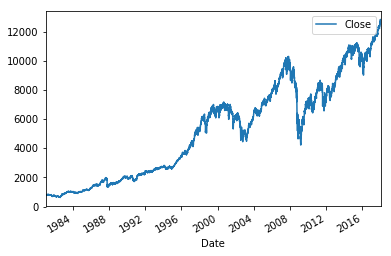

In [9]:
data = df_idx
data.plot(y='Close')

In [10]:
diff = data.index.values[-1] - data.index.values[0]
days = diff.astype('timedelta64[D]')
days = days / np.timedelta64(1, 'D')
years = int(days/365)
print("total data days:",days)
print("Total data: %d years"%years)
print("80 percent data = 1981 to %d"%(1981 + int(0.8*years)))
print(diff)

total data days: 13510.0
Total data: 37 years
80 percent data = 1981 to 2010
1167264000000000000 nanoseconds


In [11]:
#切割訓練與測試資料
split_date = pd.Timestamp('01-01-2011')

train = data.loc[:split_date]
test = data.loc[split_date:]
test_date = test.index
test_date = pd.to_datetime(test_date)
train_date = train.index
train_date = pd.to_datetime(train_date)

In [12]:
# 資料正規化

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

C:\Windows\system32\env002\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [13]:
#without sc
#train_sc = train
#test_sc = test

In [14]:
train_sc.shape

(7570, 48)

In [15]:
train_sc_df = pd.DataFrame(train_sc,index=train.index,columns=train.columns)
test_sc_df = pd.DataFrame(test_sc,index=test.index,columns=test.columns)



In [16]:
train_sc_df

Close  vex_sign  cave_sign    <Open>    <High>     <Low>  \
Date                                                                      
1981-01-02  0.021235       0.0        0.0  0.021235  0.021070  0.021381   
1981-01-05  0.022129       0.0        1.0  0.022129  0.021958  0.022282   
1981-01-06  0.022195       0.0        1.0  0.022195  0.022024  0.022348   
1981-01-07  0.020176       1.0        0.0  0.020176  0.020020  0.020315   
1981-01-08  0.018987       1.0        0.0  0.018987  0.018840  0.019118   
1981-01-09  0.019249       0.0        1.0  0.019249  0.019100  0.019382   
1981-01-12  0.019336       0.0        1.0  0.019336  0.019186  0.019469   
1981-01-13  0.019150       1.0        0.0  0.019150  0.019002  0.019282   
1981-01-14  0.019369       0.0        1.0  0.019369  0.019219  0.019502   
1981-01-15  0.019849       0.0        1.0  0.019849  0.019695  0.019985   
1981-01-16  0.020220       0.0        1.0  0.020220  0.020064  0.020360   
1981-01-19  0.019968       1.0        0.0  0.019968  0.019814  0.020106   
1981-01-20  0.018343       1.0        0.0  0.018343  0.018201  0.018469   
1981-01-21  0.018102       1.0        0.0  0.018103  0.017962  0.018227   
1981-01-22  0.017415       1.0        0.0  0.017415  0.017280  0.017535   
1981-01-23  0.017372       1.0        0.0  0.017372  0.017237  0.017492   
1981-01-26  0.017077       1.0        0.0  0.017077  0.016944  0.017194   
1981-01-27  0.017885       0.0        1.0  0.017885  0.017746  0.018008   
1981-01-28  0.017437       1.0        0.0  0.017437  0.017302  0.017557   
1981-01-29  0.017339       1.0        0.0  0.017339  0.017205  0.017458   
1981-01-30  0.016881       1.0        0.0  0.016881  0.016750  0.016997   
1981-02-02  0.015134       1.0        0.0  0.015134  0.015017  0.015239   
1981-02-03  0.016019       0.0        1.0  0.016019  0.015895  0.016129   
1981-02-04  0.016193       0.0        1.0  0.016193  0.016068  0.016305   
1981-02-05  0.016924       0.0        1.0  0.016924  0.016793  0.017041   
1981-02-06  0.017491       0.0        1.0  0.017492  0.017356  0.017612   
1981-02-09  0.016640       1.0        0.0  0.016640  0.016511  0.016755   
1981-02-10  0.016564       1.0        0.0  0.016564  0.016436  0.016678   
1981-02-11  0.016007       1.0        0.0  0.016008  0.015884  0.016118   
1981-02-12  0.015549       1.0        0.0  0.015549  0.015429  0.015656   
...              ...       ...        ...       ...       ...       ...   
2010-11-18  0.722218       0.0        1.0  0.708696  0.718258  0.713579   
2010-11-19  0.724400       0.0        1.0  0.722221  0.718850  0.720675   
2010-11-22  0.721223       1.0        0.0  0.724402  0.718793  0.717531   
2010-11-23  0.706824       1.0        0.0  0.721227  0.715642  0.709336   
2010-11-24  0.718020       0.0        1.0  0.706830  0.712482  0.711700   
2010-11-26  0.709896       1.0        0.0  0.718024  0.712464  0.713557   
2010-11-29  0.708121       1.0        0.0  0.709900  0.704403  0.703271   
2010-11-30  0.702713       1.0        0.0  0.708122  0.702639  0.702845   
2010-12-01  0.720545       0.0        1.0  0.702719  0.715562  0.707560   
2010-12-02  0.731745       0.0        1.0  0.720550  0.726345  0.725514   
2010-12-03  0.735803       0.0        1.0  0.731753  0.730542  0.734697   
2010-12-06  0.734680       1.0        0.0  0.735808  0.730421  0.737063   
2010-12-07  0.734571       1.0        0.0  0.734692  0.737713  0.739344   
2010-12-08  0.735673       0.0        1.0  0.734576  0.732390  0.735815   
2010-12-09  0.738957       0.0        1.0  0.735679  0.734444  0.740117   
2010-12-10  0.743205       0.0        1.0  0.738962  0.737652  0.742864   
2010-12-13  0.745963       0.0        1.0  0.743212  0.743988  0.748332   
2010-12-14  0.746499       0.0        1.0  0.745968  0.744327  0.749392   
2010-12-15  0.740675       1.0        0.0  0.746504  0.741767  0.744724   
2010-12-16  0.744953       0.0        1.0  0.740624  0.739401  0.743900   
2010-12-17  0.744444       1.0        0.

In [17]:
test_sc_df

Close  vex_sign  cave_sign    <Open>    <High>     <Low>  \
Date                                                                      
2011-01-03  0.765978       0.0        1.0  0.757734  0.762863  0.762954   
2011-01-04  0.763730       1.0        0.0  0.765986  0.761960  0.763485   
2011-01-05  0.765573       0.0        1.0  0.763734  0.760090  0.763599   
2011-01-06  0.761533       1.0        0.0  0.765576  0.760625  0.765030   
2011-01-07  0.759410       1.0        0.0  0.761538  0.757786  0.758497   
2011-01-10  0.757941       1.0        0.0  0.759413  0.753533  0.757270   
2011-01-11  0.763368       0.0        1.0  0.757948  0.758773  0.763170   
2011-01-12  0.774132       0.0        1.0  0.763380  0.768532  0.768640   
2011-01-13  0.773766       1.0        0.0  0.774137  0.770802  0.777234   
2011-01-14  0.779410       0.0        1.0  0.773769  0.773379  0.776632   
2011-01-18  0.781143       0.0        1.0  0.779416  0.775486  0.783895   
2011-01-19  0.772268       1.0        0.0  0.781146  0.776054  0.775931   
2011-01-20  0.769358       1.0        0.0  0.772267  0.766287  0.768274   
2011-01-21  0.772354       0.0        1.0  0.769363  0.771086  0.774663   
2011-01-24  0.777686       0.0        1.0  0.772356  0.772245  0.776860   
2011-01-25  0.776005       1.0        0.0  0.777689  0.771667  0.775139   
2011-01-26  0.781424       0.0        1.0  0.776018  0.776472  0.781365   
2011-01-27  0.782809       0.0        1.0  0.781429  0.778334  0.785025   
2011-01-28  0.767905       1.0        0.0  0.782814  0.777079  0.772429   
2011-01-31  0.775802       0.0        1.0  0.767911  0.770803  0.773201   
2011-02-01  0.791378       0.0        1.0  0.775811  0.785856  0.781156   
2011-02-02  0.789570       1.0        0.0  0.791380  0.786347  0.793940   
2011-02-03  0.791271       0.0        1.0  0.789574  0.785829  0.788143   
2011-02-04  0.791214       1.0        0.0  0.791277  0.785149  0.791312   
2011-02-07  0.796182       0.0        1.0  0.791223  0.792077  0.796674   
2011-02-08  0.800641       0.0        1.0  0.796188  0.794529  0.800151   
2011-02-09  0.796941       1.0        0.0  0.800646  0.794446  0.798721   
2011-02-10  0.796233       1.0        0.0  0.796940  0.790890  0.794649   
2011-02-11  0.800129       0.0        1.0  0.796237  0.795120  0.797131   
2011-02-14  0.803252       0.0        1.0  0.800134  0.797521  0.804999   
...              ...       ...        ...       ...       ...       ...   
2017-11-16  1.205541       0.0        1.0  1.200956  1.198120  1.209230   
2017-11-17  1.205501       1.0        0.0  1.203278  1.197382  1.211156   
2017-11-20  1.207346       0.0        1.0  1.205898  1.199061  1.212990   
2017-11-21  1.214067       0.0        1.0  1.210636  1.205843  1.218976   
2017-11-22  1.214576       0.0        1.0  1.216164  1.207833  1.221857   
2017-11-24  1.217786       0.0        1.0  1.217976  1.209363  1.225921   
2017-11-27  1.214572       1.0        0.0  1.217730  1.208915  1.222897   
2017-11-28  1.227931       0.0        1.0  1.216784  1.218779  1.224904   
2017-11-29  1.232171       0.0        1.0  1.228900  1.224530  1.237367   
2017-11-30  1.239032       0.0        1.0  1.235794  1.234145  1.243122   
2017-12-01  1.237666       1.0        0.0  1.239961  1.231645  1.230538   
2017-12-04  1.239764       0.0        1.0  1.245023  1.239347  1.248104   
2017-12-05  1.232774       1.0        0.0  1.239857  1.230733  1.240478   
2017-12-06  1.229190       1.0        0.0  1.231028  1.223076  1.236835   
2017-12-07  1.232962       0.0        1.0  1.227674  1.224697  1.235546   
2017-12-08  1.240607       0.0        1.0  1.236687  1.231014  1.243400   
2017-12-11  1.243203       0.0        1.0  1.241651  1.233694  1.250002   
2017-12-12  1.246254       0.0        1.0  1.244499  1.238588  1.252469   
2017-12-13  1.246430       0.0        1.0  1.247426  1.240914  1.255024   
2017-12-14  1.239163       1.0        0.0  1.247191  1.238254  1.247708   
2017-12-15  1.246450       0.0        1.

In [18]:
for s in range(-5,-4):
    train_sc_df['Y_{}'.format(s)] = train_sc_df['Close'].shift(s)
    test_sc_df['Y_{}'.format(s)] = test_sc_df['Close'].shift(s)



In [19]:
train_sc_df

Close  vex_sign  cave_sign    <Open>    <High>     <Low>  \
Date                                                                      
1981-01-02  0.021235       0.0        0.0  0.021235  0.021070  0.021381   
1981-01-05  0.022129       0.0        1.0  0.022129  0.021958  0.022282   
1981-01-06  0.022195       0.0        1.0  0.022195  0.022024  0.022348   
1981-01-07  0.020176       1.0        0.0  0.020176  0.020020  0.020315   
1981-01-08  0.018987       1.0        0.0  0.018987  0.018840  0.019118   
1981-01-09  0.019249       0.0        1.0  0.019249  0.019100  0.019382   
1981-01-12  0.019336       0.0        1.0  0.019336  0.019186  0.019469   
1981-01-13  0.019150       1.0        0.0  0.019150  0.019002  0.019282   
1981-01-14  0.019369       0.0        1.0  0.019369  0.019219  0.019502   
1981-01-15  0.019849       0.0        1.0  0.019849  0.019695  0.019985   
1981-01-16  0.020220       0.0        1.0  0.020220  0.020064  0.020360   
1981-01-19  0.019968       1.0        0.0  0.019968  0.019814  0.020106   
1981-01-20  0.018343       1.0        0.0  0.018343  0.018201  0.018469   
1981-01-21  0.018102       1.0        0.0  0.018103  0.017962  0.018227   
1981-01-22  0.017415       1.0        0.0  0.017415  0.017280  0.017535   
1981-01-23  0.017372       1.0        0.0  0.017372  0.017237  0.017492   
1981-01-26  0.017077       1.0        0.0  0.017077  0.016944  0.017194   
1981-01-27  0.017885       0.0        1.0  0.017885  0.017746  0.018008   
1981-01-28  0.017437       1.0        0.0  0.017437  0.017302  0.017557   
1981-01-29  0.017339       1.0        0.0  0.017339  0.017205  0.017458   
1981-01-30  0.016881       1.0        0.0  0.016881  0.016750  0.016997   
1981-02-02  0.015134       1.0        0.0  0.015134  0.015017  0.015239   
1981-02-03  0.016019       0.0        1.0  0.016019  0.015895  0.016129   
1981-02-04  0.016193       0.0        1.0  0.016193  0.016068  0.016305   
1981-02-05  0.016924       0.0        1.0  0.016924  0.016793  0.017041   
1981-02-06  0.017491       0.0        1.0  0.017492  0.017356  0.017612   
1981-02-09  0.016640       1.0        0.0  0.016640  0.016511  0.016755   
1981-02-10  0.016564       1.0        0.0  0.016564  0.016436  0.016678   
1981-02-11  0.016007       1.0        0.0  0.016008  0.015884  0.016118   
1981-02-12  0.015549       1.0        0.0  0.015549  0.015429  0.015656   
...              ...       ...        ...       ...       ...       ...   
2010-11-18  0.722218       0.0        1.0  0.708696  0.718258  0.713579   
2010-11-19  0.724400       0.0        1.0  0.722221  0.718850  0.720675   
2010-11-22  0.721223       1.0        0.0  0.724402  0.718793  0.717531   
2010-11-23  0.706824       1.0        0.0  0.721227  0.715642  0.709336   
2010-11-24  0.718020       0.0        1.0  0.706830  0.712482  0.711700   
2010-11-26  0.709896       1.0        0.0  0.718024  0.712464  0.713557   
2010-11-29  0.708121       1.0        0.0  0.709900  0.704403  0.703271   
2010-11-30  0.702713       1.0        0.0  0.708122  0.702639  0.702845   
2010-12-01  0.720545       0.0        1.0  0.702719  0.715562  0.707560   
2010-12-02  0.731745       0.0        1.0  0.720550  0.726345  0.725514   
2010-12-03  0.735803       0.0        1.0  0.731753  0.730542  0.734697   
2010-12-06  0.734680       1.0        0.0  0.735808  0.730421  0.737063   
2010-12-07  0.734571       1.0        0.0  0.734692  0.737713  0.739344   
2010-12-08  0.735673       0.0        1.0  0.734576  0.732390  0.735815   
2010-12-09  0.738957       0.0        1.0  0.735679  0.734444  0.740117   
2010-12-10  0.743205       0.0        1.0  0.738962  0.737652  0.742864   
2010-12-13  0.745963       0.0        1.0  0.743212  0.743988  0.748332   
2010-12-14  0.746499       0.0        1.0  0.745968  0.744327  0.749392   
2010-12-15  0.740675       1.0        0.0  0.746504  0.741767  0.744724   
2010-12-16  0.744953       0.0        1.0  0.740624  0.739401  0.743900   
2010-12-17  0.744444       1.0        0.

In [20]:
test_sc_df

Close  vex_sign  cave_sign    <Open>    <High>     <Low>  \
Date                                                                      
2011-01-03  0.765978       0.0        1.0  0.757734  0.762863  0.762954   
2011-01-04  0.763730       1.0        0.0  0.765986  0.761960  0.763485   
2011-01-05  0.765573       0.0        1.0  0.763734  0.760090  0.763599   
2011-01-06  0.761533       1.0        0.0  0.765576  0.760625  0.765030   
2011-01-07  0.759410       1.0        0.0  0.761538  0.757786  0.758497   
2011-01-10  0.757941       1.0        0.0  0.759413  0.753533  0.757270   
2011-01-11  0.763368       0.0        1.0  0.757948  0.758773  0.763170   
2011-01-12  0.774132       0.0        1.0  0.763380  0.768532  0.768640   
2011-01-13  0.773766       1.0        0.0  0.774137  0.770802  0.777234   
2011-01-14  0.779410       0.0        1.0  0.773769  0.773379  0.776632   
2011-01-18  0.781143       0.0        1.0  0.779416  0.775486  0.783895   
2011-01-19  0.772268       1.0        0.0  0.781146  0.776054  0.775931   
2011-01-20  0.769358       1.0        0.0  0.772267  0.766287  0.768274   
2011-01-21  0.772354       0.0        1.0  0.769363  0.771086  0.774663   
2011-01-24  0.777686       0.0        1.0  0.772356  0.772245  0.776860   
2011-01-25  0.776005       1.0        0.0  0.777689  0.771667  0.775139   
2011-01-26  0.781424       0.0        1.0  0.776018  0.776472  0.781365   
2011-01-27  0.782809       0.0        1.0  0.781429  0.778334  0.785025   
2011-01-28  0.767905       1.0        0.0  0.782814  0.777079  0.772429   
2011-01-31  0.775802       0.0        1.0  0.767911  0.770803  0.773201   
2011-02-01  0.791378       0.0        1.0  0.775811  0.785856  0.781156   
2011-02-02  0.789570       1.0        0.0  0.791380  0.786347  0.793940   
2011-02-03  0.791271       0.0        1.0  0.789574  0.785829  0.788143   
2011-02-04  0.791214       1.0        0.0  0.791277  0.785149  0.791312   
2011-02-07  0.796182       0.0        1.0  0.791223  0.792077  0.796674   
2011-02-08  0.800641       0.0        1.0  0.796188  0.794529  0.800151   
2011-02-09  0.796941       1.0        0.0  0.800646  0.794446  0.798721   
2011-02-10  0.796233       1.0        0.0  0.796940  0.790890  0.794649   
2011-02-11  0.800129       0.0        1.0  0.796237  0.795120  0.797131   
2011-02-14  0.803252       0.0        1.0  0.800134  0.797521  0.804999   
...              ...       ...        ...       ...       ...       ...   
2017-11-16  1.205541       0.0        1.0  1.200956  1.198120  1.209230   
2017-11-17  1.205501       1.0        0.0  1.203278  1.197382  1.211156   
2017-11-20  1.207346       0.0        1.0  1.205898  1.199061  1.212990   
2017-11-21  1.214067       0.0        1.0  1.210636  1.205843  1.218976   
2017-11-22  1.214576       0.0        1.0  1.216164  1.207833  1.221857   
2017-11-24  1.217786       0.0        1.0  1.217976  1.209363  1.225921   
2017-11-27  1.214572       1.0        0.0  1.217730  1.208915  1.222897   
2017-11-28  1.227931       0.0        1.0  1.216784  1.218779  1.224904   
2017-11-29  1.232171       0.0        1.0  1.228900  1.224530  1.237367   
2017-11-30  1.239032       0.0        1.0  1.235794  1.234145  1.243122   
2017-12-01  1.237666       1.0        0.0  1.239961  1.231645  1.230538   
2017-12-04  1.239764       0.0        1.0  1.245023  1.239347  1.248104   
2017-12-05  1.232774       1.0        0.0  1.239857  1.230733  1.240478   
2017-12-06  1.229190       1.0        0.0  1.231028  1.223076  1.236835   
2017-12-07  1.232962       0.0        1.0  1.227674  1.224697  1.235546   
2017-12-08  1.240607       0.0        1.0  1.236687  1.231014  1.243400   
2017-12-11  1.243203       0.0        1.0  1.241651  1.233694  1.250002   
2017-12-12  1.246254       0.0        1.0  1.244499  1.238588  1.252469   
2017-12-13  1.246430       0.0        1.0  1.247426  1.240914  1.255024   
2017-12-14  1.239163       1.0        0.0  1.247191  1.238254  1.247708   
2017-12-15  1.246450       0.0        1.

In [21]:
#X_train = train_sc_df.dropna().drop('Y', axis=1)
X_train = train_sc_df.dropna().drop('Y_-5', axis=1)
y_train = train_sc_df.dropna()['Y_-5']
X_train = X_train.as_matrix()
y_train = y_train.as_matrix()
vex_sign_train = train.dropna()['vex_sign']
vex_sign_train = vex_sign_train[5:]
vex_sign_train = vex_sign_train.as_matrix()
cave_sign_train = train.dropna()['cave_sign']
cave_sign_train = cave_sign_train[5:]
cave_sign_train = cave_sign_train.as_matrix()
vex_sign_train[0],cave_sign_train[0]=0,0

C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [22]:
vex_sign_train[0:7]

array([0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [23]:
vex_sign_train.shape

(7565,)

In [24]:
X_train

array([[0.02123455, 0.        , 0.        , ..., 0.44481605, 0.1198527 ,
        0.        ],
       [0.0221293 , 0.        , 1.        , ..., 0.44481605, 0.1198527 ,
        0.        ],
       [0.02219534, 0.        , 1.        , ..., 0.44481605, 0.1198527 ,
        0.        ],
       ...,
       [0.75175002, 0.        , 1.        , ..., 0.68896321, 0.03615668,
        0.        ],
       [0.75439815, 0.        , 1.        , ..., 0.68896321, 0.03615668,
        0.        ],
       [0.75373767, 1.        , 0.        , ..., 0.68896321, 0.03615668,
        0.        ]])

In [25]:
X_train.shape

(7565, 48)

In [26]:
y_train.shape

(7565,)

In [27]:
X_test = test_sc_df.dropna().drop('Y_-5', axis=1)
y_test = test_sc_df.dropna().dropna()['Y_-5']
X_test = X_test.as_matrix()
y_test = y_test.as_matrix()
vex_sign_test = test.dropna().dropna()['vex_sign']
vex_sign_test = vex_sign_test[5:]
vex_sign_test = vex_sign_test.as_matrix()
cave_sign_test = test.dropna().dropna()['cave_sign']
cave_sign_test = cave_sign_test[5:]
cave_sign_test = cave_sign_test.as_matrix()

vex_sign_test[0],cave_sign_test[0]=0,0

C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


In [28]:
y_train

array([0.01924897, 0.01933566, 0.0191499 , ..., 0.75746527, 0.75647764,
       0.7577274 ])

In [29]:
X_test

array([[ 0.76597828,  0.        ,  1.        , ...,  0.67892977,
         0.02360228,  0.        ],
       [ 0.76372954,  1.        ,  0.        , ...,  0.67892977,
         0.02360228,  0.        ],
       [ 0.76557271,  0.        ,  1.        , ...,  0.67892977,
         0.02360228,  0.        ],
       ...,
       [ 1.25138934,  1.        ,  0.        , ...,  0.68060201,
        -0.1282223 ,  0.        ],
       [ 1.25139037,  0.        ,  1.        , ...,  0.68060201,
        -0.1282223 ,  0.        ],
       [ 1.25682491,  0.        ,  1.        , ...,  0.68060201,
        -0.1282223 ,  0.        ]])

In [30]:
y_test

array([0.75794103, 0.76336834, 0.77413216, ..., 1.25907262, 1.26228216,
       1.25771553])

In [31]:
print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))

Train size: (7565 x 48)
Test size: (1756 x 48)


# setup

In [32]:
loss_imagepath ='images/loss/'
predict_imagepath ='images/predict/'
losspath = 'csv/loss/'
if (not (os.path.exists(losspath))):
        os.makedirs(losspath)
model_dirpath = 'h5/'
file_name='file_name'

#for func initiate
history_model='history_model'
input_tensor='input_tensor'
vex_sign='vex_sign'
cave_sign='cave_sign'
y_pred='y_pred'
Target_DirPath='Target_DirPath'
test_date_trim='test_date_trim'
train_date_trim='train_date_trim'


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Add,Reshape,Lambda
from tensorflow.keras.optimizers import Adam, RMSprop
import tensorflow.keras.backend as K
from sklearn.metrics import r2_score
from tensorflow.keras.callbacks import EarlyStopping,CSVLogger
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Input,layers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import PReLU
from tensorflow.keras.utils import plot_model
K.clear_session()
#from tcn import compiled_tcn,TCN

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


val_split_ratio = 0.1
penalty=1

In [34]:
def plot_model_architecture(model, file_name):
    file_path = 'images/model/{}.png'.format(file_name)
    if not os.path.exists(os.path.dirname(file_path)):
        try:
            os.makedirs(os.path.dirname(file_path))
        except OSError as exc: # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise

    plot_model(model, to_file=file_path, show_shapes=True)

In [35]:
def loadmodel(model_dirpath=model_dirpath,file_name=file_name):
    model = load_model(model_dirpath + file_name + '.h5')
    return model
def loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name):
    import matplotlib.pyplot as plt
    print(history_model.history.keys())
    loss = history_model.history['loss']
    val_loss = history_model.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    if (not (os.path.exists(loss_imagepath))):
                os.makedirs(loss_imagepath)
    plt.savefig(loss_imagepath +  file_name +'_lr0001_dila16_loss.png')
def CSV(losspath=losspath, file_name=file_name):
    csv_logger = CSVLogger(losspath + file_name + '_lr0001_dila16_log.csv')
    return csv_logger
def predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign,cave_sign=cave_sign,
                  predict_imagepath=predict_imagepath, file_name=file_name):
    from sklearn.metrics import r2_score
    y_pred = model.predict([X_tst_t,vex_sign,cave_sign])
    #y_pred是三天前就知道，所以往前移三格
    y_test_pic = y_test[:]
    y_pred_pic = y_pred[5:]
    y_test_rsquare = y_test[:]
    plt.plot(y_test_pic, label='True')
    plt.plot(y_pred_pic, label='pred')
    plt.xlabel('Observation')
    plt.ylabel('Scaled_Value')
    plt.legend()
    print("y_pred.shape:",y_pred.shape)
    print("y_test_rsquare.shape:",y_test_rsquare.shape)
    r2_test = r2_score(y_test_rsquare, y_pred)
    print('R-Squared: %f'%(r2_test))
    print("The Adjusted R2 score on the Test set is:\t{:0.3f}"\
          .format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))
    if (not (os.path.exists(predict_imagepath))):
            os.makedirs(predict_imagepath)
    plt.savefig(predict_imagepath +  file_name +'_lr0001_dila16_loss.png')
    plt.show()    
    return y_pred
def save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,\
             file_name=file_name,test_date=test_date):
    # 把價格縮放解除
    ## create empty table with label fields
    y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
    ## put the predicted values in the right field
    y_pred_data_like[:,0] = y_pred[:,0]
    ## inverse transform and then select the right field
    y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

    #檢查測試資料的維度
    yd_size = X_test.shape[0]

    # 把價格轉換維度
    yd = y_pred_data.reshape(yd_size,)

    #把最後X天刪除(預測X天後)
    test_date_trim = np.delete(test_date, np.s_[-5:])

    # 製作CSV
    AnalysisResult = pd.DataFrame()
    Date = pd.Series(test_date_trim)
    Close = pd.Series(yd)
    Date.name = 'Date'
    Close.name = 'Close'

    # 因為放在MC要開高低收，所以複製收盤填入
    Open = Close.copy()
    High = Close.copy()
    Low = Close.copy()
    Open.name = 'Open'
    High.name = 'High'
    Low.name = 'Low'

    AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Close], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

    # 輸出CSV檔案
    import os
    Target_DirPath = 'Deep-Learning-in-Python-master/'
    if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
    AnalysisResult.to_csv(Target_DirPath + file_name+'_lr0001_dila16.csv', mode='w', header=True, index=False)
    
def save_train_csv(file_name=file_name):
    y_train_pred = model.predict([X_tr_t,vex_sign_train,cave_sign_train])
    # 把價格縮放解除
    ## create empty table with label fields
    y_train_pred_data_like = np.zeros(shape=(len(y_train_pred), X_train.shape[1]))
    ## put the predicted values in the right field
    y_train_pred_data_like[:,0] = y_train_pred[:,0]
    ## inverse transform and then select the right field
    y_train_pred_data = sc.inverse_transform(y_train_pred_data_like)[:,0]

    #檢查測試資料的維度
    yd_size = X_train.shape[0]

    # 把價格轉換維度
    yd = y_train_pred_data.reshape(yd_size,)

    #把最後X天刪除(預測X天後)
    train_date_trim = np.delete(train_date, np.s_[-5:])

    # 製作CSV
    AnalysisResult = pd.DataFrame()
    Date = pd.Series(train_date_trim)
    Close = pd.Series(yd)
    Date.name = 'Date'
    Close.name = 'Close'

    # 因為放在MC要開高低收，所以複製收盤填入
    Open = Close.copy()
    High = Close.copy()
    Low = Close.copy()
    Open.name = 'Open'
    High.name = 'High'
    Low.name = 'Low'

    AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Close], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

    # 輸出CSV檔案
    import os
    Target_DirPath = 'Deep-Learning-in-Python-master-train/'
    if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
    AnalysisResult.to_csv(Target_DirPath + file_name+'_lr0001_dila16_train.csv', mode='w', header=True, index=False)    

# loss func

In [36]:
def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

In [37]:
def tf_stock_loss_5(vex_sign,cave_sign):
    def loss(y_true, y_pred):
        y_pred_previous= tf.roll(y_pred, shift=-1, axis=0)
        rising = K.less(y_pred_previous,y_pred)
        falling = K.greater(y_pred_previous ,y_pred)
        convex= K.equal(vex_sign,tf.ones(shape = tf.shape(vex_sign)))
        concave= K.equal(cave_sign,tf.ones(shape = tf.shape(cave_sign)))
        losses = tf.keras.backend.cast(tf.logical_and(convex,rising),dtype='float32')*penalty* mean_squared_error(y_true, y_pred)+\
                 tf.keras.backend.cast(tf.logical_and(concave,falling),dtype='float32')*penalty*mean_squared_error(y_true, y_pred)+\
                 mean_squared_error(y_true, y_pred)
        #losses = K.all(K.stack([convex, rising], axis=0), axis=0)*penalty* mean_squared_error(y_true, y_pred)+mean_squared_error(y_true, y_pred)
        """K.all(K.stack([concave, falling], axis=0), axis=0)*penalty** mean_squared_error(y_true, y_pred)+"""
        return losses
    return loss

In [38]:
def tf_stock_loss_6(vex_sign,cave_sign):
    def loss(y_true, y_pred):
        y_pred_tobemodified0= tf.reshape(y_pred, [-1])
        y_pred_tobemodified1= tf.roll(y_pred_tobemodified0, shift=1, axis=0)
        y_pred_previous= tf.reshape(y_pred_tobemodified1,tf.shape(y_pred))
        
        rising = K.less(y_pred_previous,y_pred)
        falling = K.greater(y_pred_previous ,y_pred)
        y_pred_falling= K.equal(vex_sign,tf.ones(shape = tf.shape(vex_sign)))
        y_pred_rising= K.equal(cave_sign,tf.ones(shape = tf.shape(cave_sign)))
        losses = tf.keras.backend.cast(tf.logical_and(y_pred_falling,rising),dtype='float32')*penalty* mean_squared_error(y_true, y_pred)+\
                 tf.keras.backend.cast(tf.logical_and(y_pred_rising,falling),dtype='float32')*penalty*mean_squared_error(y_true, y_pred)+\
                 mean_squared_error(y_true, y_pred)       
        return losses
    return loss

# tcn

In [39]:
act_of_skip_connections='selu'

In [40]:
import tensorflow.keras.backend as K
import tensorflow.keras.layers
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Activation, Lambda
from tensorflow.keras.layers import Conv1D, SpatialDropout1D
from tensorflow.keras.layers import Convolution1D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import Input

from typing import List, Tuple


def channel_normalization(x):
    # type: (Layer) -> Layer
    """ Normalize a layer to the maximum activation

    This keeps a layers values between zero and one.
    It helps with relu's unbounded activation

    Args:
        x: The layer to normalize

    Returns:
        A maximal normalized layer
    """
    max_values = K.max(K.abs(x), 2, keepdims=True) + 1e-5
    out = x / max_values
    return out


def wave_net_activation(x):
    # type: (Layer) -> Layer
    """This method defines the activation used for WaveNet

    described in https://deepmind.com/blog/wavenet-generative-model-raw-audio/

    Args:
        x: The layer we want to apply the activation to

    Returns:
        A new layer with the wavenet activation applied
    """
    tanh_out = Activation('tanh')(x)
    sigm_out = Activation('sigmoid')(x)
    return tensorflow.keras.layers.multiply([tanh_out, sigm_out])


def residual_block(x, s, i, activation, nb_filters, kernel_size, padding, dropout_rate=0, name=''):
    # type: (Layer, int, int, str, int, int, str, float, str) -> Tuple[Layer, Layer]
    """Defines the residual block for the WaveNet TCN

    Args:
        x: The previous layer in the model
        s: The stack index i.e. which stack in the overall TCN
        i: The dilation power of 2 we are using for this residual block
        activation: The name of the type of activation to use
        nb_filters: The number of convolutional filters to use in this block
        kernel_size: The size of the convolutional kernel
        padding: The padding used in the convolutional layers, 'same' or 'causal'.
        dropout_rate: Float between 0 and 1. Fraction of the input units to drop.
        name: Name of the model. Useful when having multiple TCN.

    Returns:
        A tuple where the first element is the residual model layer, and the second
        is the skip connection.
    """

    original_x = x
    conv = Conv1D(filters=nb_filters, kernel_size=kernel_size,
                  dilation_rate=i, padding=padding,
                  name=name + '_d_%s_conv_%d_tanh_s%d' % (padding, i, s))(x)
    if activation == 'norm_relu':
        x = Activation('relu')(conv)
        x = Lambda(channel_normalization)(x)
    elif activation == 'wavenet':
        x = wave_net_activation(conv)
    else:
        x = Activation(activation)(conv)

    x = SpatialDropout1D(dropout_rate, name=name + '_spatial_dropout1d_%d_s%d_%f' % (i, s, dropout_rate))(x)

    # 1x1 conv.
    x = Convolution1D(nb_filters, 1, padding='same')(x)
    res_x = tensorflow.keras.layers.add([original_x, x])
    return res_x, x


def process_dilations(dilations):
    def is_power_of_two(num):
        return num != 0 and ((num & (num - 1)) == 0)

    if all([is_power_of_two(i) for i in dilations]):
        return dilations

    else:
        new_dilations = [2 ** i for i in dilations]
        # print(f'Updated dilations from {dilations} to {new_dilations} because of backwards compatibility.')
        return new_dilations


class TCN:
    """Creates a TCN layer.

        Input shape:
            A tensor of shape (batch_size, timesteps, input_dim).

        Args:
            nb_filters: The number of filters to use in the convolutional layers.
            kernel_size: The size of the kernel to use in each convolutional layer.
            dilations: The list of the dilations. Example is: [1, 2, 4, 8, 16, 32, 64].
            nb_stacks : The number of stacks of residual blocks to use.
            activation: The activations to use (norm_relu, wavenet, relu...).
            padding: The padding to use in the convolutional layers, 'causal' or 'same'.
            use_skip_connections: Boolean. If we want to add skip connections from input to each residual block.
            return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.
            dropout_rate: Float between 0 and 1. Fraction of the input units to drop.
            name: Name of the model. Useful when having multiple TCN.

        Returns:
            A TCN layer.
        """

    def __init__(self,
                 nb_filters=64,
                 kernel_size=2,
                 nb_stacks=1,
                 dilations=[1, 2, 4, 8, 16],
                 activation='norm_relu',
                 padding='causal',
                 use_skip_connections=True,
                 dropout_rate=0.0,
                 return_sequences=True,
                 name='tcn'):
        self.name = name
        self.return_sequences = return_sequences
        self.dropout_rate = dropout_rate
        self.use_skip_connections = use_skip_connections
        self.activation = activation
        self.dilations = dilations
        self.nb_stacks = nb_stacks
        self.kernel_size = kernel_size
        self.nb_filters = nb_filters
        self.padding = padding

        if padding != 'causal' and padding != 'same':
            raise ValueError("Only 'causal' or 'same' padding are compatible for this layer.")

        if not isinstance(nb_filters, int):
            print('An interface change occurred after the version 2.1.2.')
            print('Before: tcn.TCN(i, return_sequences=False, ...)')
            print('Now should be: tcn.TCN(return_sequences=False, ...)(i)')
            print('Second solution is to pip install keras-tcn==2.1.2 to downgrade.')
            raise Exception()

    def __call__(self, inputs, Activation_of_skip_connections='selu'):
        x = inputs
        x = Convolution1D(self.nb_filters, 1, padding=self.padding, name=self.name + '_initial_conv')(x)
        skip_connections = []
        for s in range(self.nb_stacks):
            for i in self.dilations:
                x, skip_out = residual_block(x, s, i, self.activation, self.nb_filters,
                                             self.kernel_size, self.padding, self.dropout_rate, name=self.name)
                skip_connections.append(skip_out)
        if self.use_skip_connections:
            x = tensorflow.keras.layers.add(skip_connections)
        x = Activation(Activation_of_skip_connections)(x)

        if not self.return_sequences:
            output_slice_index = -1
            x = Lambda(lambda tt: tt[:, output_slice_index, :])(x)
        return x


def compiled_tcn(num_feat,  # type: int
                 num_classes,  # type: int
                 nb_filters,  # type: int
                 kernel_size,  # type: int
                 dilations,  # type: List[int]
                 nb_stacks,  # type: int
                 max_len,  # type: int
                 activation='norm_relu',  # type: str
                 padding='causal',  # type: str
                 use_skip_connections=True,  # type: bool
                 return_sequences=True,
                 regression=False,  # type: bool
                 dropout_rate=0.05,  # type: float
                 name='tcn'  # type: str
                 ):
    # type: (...) -> tensorflow.keras.Model
    """Creates a compiled TCN model for a given task (i.e. regression or classification).

    Args:
        num_feat: The number of features of your input, i.e. the last dimension of: (batch_size, timesteps, input_dim).
        num_classes: The size of the final dense layer, how many classes we are predicting.
        nb_filters: The number of filters to use in the convolutional layers.
        kernel_size: The size of the kernel to use in each convolutional layer.
        dilations: The list of the dilations. Example is: [1, 2, 4, 8, 16, 32, 64].
        nb_stacks : The number of stacks of residual blocks to use.
        max_len: The maximum sequence length, use None if the sequence length is dynamic.
        activation: The activations to use.
        padding: The padding to use in the convolutional layers.
        use_skip_connections: Boolean. If we want to add skip connections from input to each residual block.
        return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.
        regression: Whether the output should be continuous or discrete.
        dropout_rate: Float between 0 and 1. Fraction of the input units to drop.
        name: Name of the model. Useful when having multiple TCN.

    Returns:
        A compiled keras TCN.
    """

    dilations = process_dilations(dilations)

    input_layer = Input(shape=(max_len, num_feat))

    x = TCN(nb_filters, kernel_size, nb_stacks, dilations, activation,
            padding, use_skip_connections, dropout_rate, return_sequences, name)(input_layer)

    print('x.shape=', x.shape)

    if not regression:
        # classification
        x = Dense(num_classes)(x)
        x = Activation('softmax')(x)
        output_layer = x
        print(f'model.x = {input_layer.shape}')
        print(f'model.y = {output_layer.shape}')
        model = Model(input_layer, output_layer)

        # https://github.com/keras-team/keras/pull/11373
        # It's now in Keras@master but still not available with pip.
        # TODO To remove later.
        def accuracy(y_true, y_pred):
            # reshape in case it's in shape (num_samples, 1) instead of (num_samples,)
            if K.ndim(y_true) == K.ndim(y_pred):
                y_true = K.squeeze(y_true, -1)
            # convert dense predictions to labels
            y_pred_labels = K.argmax(y_pred, axis=-1)
            y_pred_labels = K.cast(y_pred_labels, K.floatx())
            return K.cast(K.equal(y_true, y_pred_labels), K.floatx())

        adam = optimizers.Adam(lr=0.002, clipnorm=1.)
        model.compile(adam, loss='sparse_categorical_crossentropy', metrics=[accuracy])
        print('Adam with norm clipping.')
    else:
        # regression
        x = Dense(1)(x)
        x = Activation('linear')(x)
        output_layer = x
        print(f'model.x = {input_layer.shape}')
        print(f'model.y = {output_layer.shape}')
        model = Model(input_layer, output_layer)
        adam = optimizers.Adam(lr=0.002, clipnorm=1.)
        model.compile(adam, loss=tf_stock_loss_6(vex_sign=vex_sign,cave_sign=cave_sign))

    return model

In [41]:
#tcn6 tcn6~8 dila=32 dr=0.2~0.4
file_name='NYA_de5_clf4_pe1_tcn6'
#rerun

In [42]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
        activation='selu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.2, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=tf_stock_loss_6(vex_sign=vex_sign,cave_sign=cave_sign))
model.summary()
history_model = model.fit(x=[X_tr_t,vex_sign_train,cave_sign_train], y=y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12544       input_1[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation (Activation)         (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
______________________________________________________________________________________________

Epoch 10/600
6808/6808==============================] - 6s 942us/sample - loss: 0.0058 - val_loss: 0.1016
Epoch 11/600
6808/6808==============================] - 6s 952us/sample - loss: 0.0065 - val_loss: 0.0604
Epoch 12/600
6808/6808==============================] - 7s 969us/sample - loss: 0.0047 - val_loss: 0.0600
Epoch 13/600
6808/6808==============================] - 7s 967us/sample - loss: 0.0044 - val_loss: 0.0732
Epoch 14/600
6808/6808==============================] - 6s 942us/sample - loss: 0.0042 - val_loss: 0.1058
Epoch 15/600
6808/6808==============================] - 7s 982us/sample - loss: 0.0030 - val_loss: 0.0642
Epoch 16/600
6808/6808==============================] - 7s 983us/sample - loss: 0.0042 - val_loss: 0.0512
Epoch 17/600
6808/6808==============================] - 6s 951us/sample - loss: 0.0038 - val_loss: 0.0454
Epoch 18/600
6808/6808==============================] - 6s 948us/sample - loss: 0.0043 - val_loss: 0.0627
Epoch 19/600
6808/6808========================

6808/6808==============================] - 7s 976us/sample - loss: 2.7550e-04 - val_loss: 0.0163
Epoch 161/600
6808/6808==============================] - 7s 980us/sample - loss: 2.7559e-04 - val_loss: 0.0124
Epoch 162/600
6808/6808==============================] - 7s 979us/sample - loss: 2.9983e-04 - val_loss: 0.0138
Epoch 163/600
6808/6808==============================] - 7s 992us/sample - loss: 2.7673e-04 - val_loss: 0.0135
Epoch 164/600
6808/6808==============================] - 7s 983us/sample - loss: 2.7419e-04 - val_loss: 0.0131
Epoch 165/600
6808/6808==============================] - 7s 993us/sample - loss: 2.7967e-04 - val_loss: 0.0148
Epoch 166/600
6808/6808==============================] - 7s 984us/sample - loss: 2.6377e-04 - val_loss: 0.0122
Epoch 167/600
6808/6808==============================] - 7s 984us/sample - loss: 2.7168e-04 - val_loss: 0.0110
Epoch 168/600
6808/6808==============================] - 7s 992us/sample - loss: 2.6375e-04 - val_loss: 0.0119
Epoch 169/600
6

Epoch 234/600
6808/6808==============================] - 4s 631us/sample - loss: 1.7563e-04 - val_loss: 0.0050
Epoch 235/600
6808/6808==============================] - 4s 635us/sample - loss: 1.9701e-04 - val_loss: 0.0068
Epoch 236/600
6808/6808==============================] - 4s 634us/sample - loss: 1.9148e-04 - val_loss: 0.0061
Epoch 237/600
6808/6808==============================] - 4s 630us/sample - loss: 2.0280e-04 - val_loss: 0.0040
Epoch 238/600
6808/6808==============================] - 4s 634us/sample - loss: 2.0660e-04 - val_loss: 0.0038
Epoch 239/600
6808/6808==============================] - 4s 628us/sample - loss: 2.1109e-04 - val_loss: 0.0050
Epoch 240/600
6808/6808==============================] - 4s 633us/sample - loss: 1.9093e-04 - val_loss: 0.0059
Epoch 241/600
6808/6808==============================] - 4s 634us/sample - loss: 2.0908e-04 - val_loss: 0.0067
Epoch 242/600
6808/6808==============================] - 4s 630us/sample - loss: 1.9999e-04 - val_loss: 0.0050
E

6808/6808==============================] - 4s 651us/sample - loss: 1.5774e-04 - val_loss: 0.0059
Epoch 381/600
6808/6808==============================] - 4s 651us/sample - loss: 1.6478e-04 - val_loss: 0.0054
Epoch 382/600
6808/6808==============================] - 4s 649us/sample - loss: 1.5815e-04 - val_loss: 0.0052
Epoch 383/600
6808/6808==============================] - 4s 649us/sample - loss: 1.4906e-04 - val_loss: 0.0079
Epoch 384/600
6808/6808==============================] - 4s 647us/sample - loss: 1.4952e-04 - val_loss: 0.0076
Epoch 385/600
6808/6808==============================] - 5s 670us/sample - loss: 1.4959e-04 - val_loss: 0.0084
Epoch 386/600
6808/6808==============================] - 4s 652us/sample - loss: 1.6560e-04 - val_loss: 0.0095
Epoch 387/600
6808/6808==============================] - 4s 651us/sample - loss: 1.5950e-04 - val_loss: 0.0101
Epoch 388/600
6808/6808==============================] - 4s 653us/sample - loss: 1.6040e-04 - val_loss: 0.0100
Epoch 389/600
6

Epoch 454/600
6808/6808==============================] - 4s 643us/sample - loss: 1.4253e-04 - val_loss: 0.0121
Epoch 455/600
6808/6808==============================] - 4s 638us/sample - loss: 1.3476e-04 - val_loss: 0.0133
Epoch 456/600
6808/6808==============================] - 4s 643us/sample - loss: 1.4426e-04 - val_loss: 0.0137
Epoch 457/600
6808/6808==============================] - 4s 640us/sample - loss: 1.4738e-04 - val_loss: 0.0132
Epoch 458/600
6808/6808==============================] - 4s 642us/sample - loss: 1.4566e-04 - val_loss: 0.0138
Epoch 459/600
6808/6808==============================] - 4s 644us/sample - loss: 1.4221e-04 - val_loss: 0.0174
Epoch 460/600
6808/6808==============================] - 4s 642us/sample - loss: 1.5863e-04 - val_loss: 0.0125
Epoch 461/600
6808/6808==============================] - 4s 645us/sample - loss: 1.5903e-04 - val_loss: 0.0108
Epoch 462/600
6808/6808==============================] - 4s 649us/sample - loss: 1.4925e-04 - val_loss: 0.0156
E

Epoch 528/600
6808/6808==============================] - 4s 641us/sample - loss: 1.5403e-04 - val_loss: 0.0065
Epoch 529/600
6808/6808==============================] - 4s 644us/sample - loss: 1.4540e-04 - val_loss: 0.0087
Epoch 530/600
6808/6808==============================] - 4s 650us/sample - loss: 1.5030e-04 - val_loss: 0.0079
Epoch 531/600
6808/6808==============================] - 4s 652us/sample - loss: 1.3695e-04 - val_loss: 0.0085
Epoch 532/600
6808/6808==============================] - 4s 647us/sample - loss: 1.3952e-04 - val_loss: 0.0100
Epoch 533/600
6808/6808==============================] - 4s 649us/sample - loss: 1.5458e-04 - val_loss: 0.0069
Epoch 534/600
6808/6808==============================] - 4s 637us/sample - loss: 1.6327e-04 - val_loss: 0.0089
Epoch 535/600
6808/6808==============================] - 4s 637us/sample - loss: 1.4990e-04 - val_loss: 0.0084
Epoch 536/600
6808/6808==============================] - 4s 637us/sample - loss: 1.4138e-04 - val_loss: 0.0093
E

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.902242
The Adjusted R2 score on the Test set is:	0.899


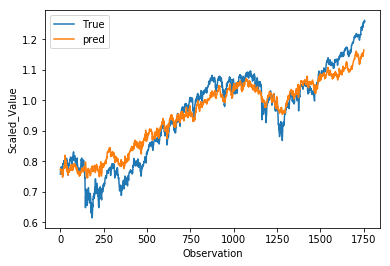

dict_keys(['loss', 'val_loss'])


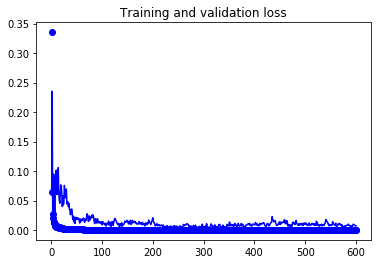

In [43]:
plot_model_architecture(model=model, file_name=file_name)
y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
             file_name=file_name,test_date=test_date)
save_train_csv(file_name=file_name)

In [44]:
#tcn7 tcn6~8 dila=32 dr=0.2~0.4
file_name='NYA_de5_clf4_pe1_tcn7'
#rerun

In [45]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
        activation='selu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.3, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=tf_stock_loss_6(vex_sign=vex_sign,cave_sign=cave_sign))
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model = model.fit(x=[X_tr_t,vex_sign_train,cave_sign_train], y=y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)




Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12544       input_4[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_6 (Activation)       (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
____________________________________________________________________________________________

Epoch 10/600
6808/6808==============================] - 4s 654us/sample - loss: 0.0072 - val_loss: 0.0286
Epoch 11/600
6808/6808==============================] - 4s 654us/sample - loss: 0.0076 - val_loss: 0.0154
Epoch 12/600
6808/6808==============================] - 4s 650us/sample - loss: 0.0057 - val_loss: 0.0103
Epoch 13/600
6808/6808==============================] - 4s 651us/sample - loss: 0.0074 - val_loss: 0.0071
Epoch 14/600
6808/6808==============================] - 4s 656us/sample - loss: 0.0050 - val_loss: 0.0251
Epoch 15/600
6808/6808==============================] - 5s 662us/sample - loss: 0.0061 - val_loss: 0.0121
Epoch 16/600
6808/6808==============================] - 4s 659us/sample - loss: 0.0054 - val_loss: 0.0448
Epoch 17/600
6808/6808==============================] - 4s 655us/sample - loss: 0.0052 - val_loss: 0.0199
Epoch 18/600
6808/6808==============================] - 4s 657us/sample - loss: 0.0047 - val_loss: 0.0542
Epoch 19/600
6808/6808========================

Epoch 86/600
6808/6808==============================] - 4s 656us/sample - loss: 5.3534e-04 - val_loss: 0.0089
Epoch 87/600
6808/6808==============================] - 4s 653us/sample - loss: 5.0619e-04 - val_loss: 0.0102
Epoch 88/600
6808/6808==============================] - 4s 649us/sample - loss: 4.6879e-04 - val_loss: 0.0090
Epoch 89/600
6808/6808==============================] - 5s 662us/sample - loss: 4.7467e-04 - val_loss: 0.0109
Epoch 90/600
6808/6808==============================] - 4s 660us/sample - loss: 4.4934e-04 - val_loss: 0.0095
Epoch 91/600
6808/6808==============================] - 4s 659us/sample - loss: 4.4603e-04 - val_loss: 0.0107
Epoch 92/600
6808/6808==============================] - 5s 664us/sample - loss: 4.1935e-04 - val_loss: 0.0110
Epoch 93/600
6808/6808==============================] - 4s 649us/sample - loss: 4.2777e-04 - val_loss: 0.0097
Epoch 94/600
6808/6808==============================] - 4s 647us/sample - loss: 4.1715e-04 - val_loss: 0.0093
Epoch 95/6

Epoch 160/600
6808/6808==============================] - 4s 651us/sample - loss: 2.4762e-04 - val_loss: 0.0109
Epoch 161/600
6808/6808==============================] - 4s 655us/sample - loss: 2.4747e-04 - val_loss: 0.0124
Epoch 162/600
6808/6808==============================] - 4s 652us/sample - loss: 2.4115e-04 - val_loss: 0.0129
Epoch 163/600
6808/6808==============================] - 4s 655us/sample - loss: 2.5687e-04 - val_loss: 0.0155
Epoch 164/600
6808/6808==============================] - 4s 658us/sample - loss: 2.4016e-04 - val_loss: 0.0136
Epoch 165/600
6808/6808==============================] - 4s 655us/sample - loss: 2.6085e-04 - val_loss: 0.0142
Epoch 166/600
6808/6808==============================] - 4s 656us/sample - loss: 2.4182e-04 - val_loss: 0.0116
Epoch 167/600
6808/6808==============================] - 4s 658us/sample - loss: 2.5261e-04 - val_loss: 0.0116
Epoch 168/600
6808/6808==============================] - 5s 664us/sample - loss: 2.3431e-04 - val_loss: 0.0105
E

6808/6808==============================] - 10s 1ms/sample - loss: 1.6712e-04 - val_loss: 0.0211
Epoch 308/600
6808/6808==============================] - 9s 1ms/sample - loss: 1.7958e-04 - val_loss: 0.0217
Epoch 309/600
6808/6808==============================] - 10s 1ms/sample - loss: 1.7215e-04 - val_loss: 0.0221
Epoch 310/600
6808/6808==============================] - 9s 1ms/sample - loss: 1.9035e-04 - val_loss: 0.0166
Epoch 311/600
6808/6808==============================] - 10s 1ms/sample - loss: 1.8252e-04 - val_loss: 0.0224
Epoch 312/600
6808/6808==============================] - 9s 1ms/sample - loss: 1.7241e-04 - val_loss: 0.0202
Epoch 313/600
6808/6808==============================] - 9s 1ms/sample - loss: 1.7598e-04 - val_loss: 0.0170
Epoch 314/600
6808/6808==============================] - 10s 1ms/sample - loss: 1.8429e-04 - val_loss: 0.0157
Epoch 315/600
6808/6808==============================] - 10s 1ms/sample - loss: 1.7258e-04 - val_loss: 0.0136
Epoch 316/600
6808/6808=====

6808/6808==============================] - 10s 1ms/sample - loss: 1.5077e-04 - val_loss: 0.0211
Epoch 383/600
6808/6808==============================] - 9s 1ms/sample - loss: 1.6107e-04 - val_loss: 0.0153
Epoch 384/600
6808/6808==============================] - 9s 1ms/sample - loss: 1.7495e-04 - val_loss: 0.0159
Epoch 385/600
6808/6808==============================] - 9s 1ms/sample - loss: 1.6610e-04 - val_loss: 0.0142
Epoch 386/600
6808/6808==============================] - 9s 1ms/sample - loss: 1.5917e-04 - val_loss: 0.0155
Epoch 387/600
6808/6808==============================] - 9s 1ms/sample - loss: 1.4983e-04 - val_loss: 0.0211
Epoch 388/600
6808/6808==============================] - 9s 1ms/sample - loss: 1.6118e-04 - val_loss: 0.0190
Epoch 389/600
6808/6808==============================] - 9s 1ms/sample - loss: 1.5482e-04 - val_loss: 0.0199
Epoch 390/600
6808/6808==============================] - 9s 1ms/sample - loss: 1.5550e-04 - val_loss: 0.0194
Epoch 391/600
6808/6808=========

Epoch 457/600
6808/6808==============================] - 4s 652us/sample - loss: 1.4532e-04 - val_loss: 0.0151
Epoch 458/600
6808/6808==============================] - 4s 654us/sample - loss: 1.4045e-04 - val_loss: 0.0114
Epoch 459/600
6808/6808==============================] - 4s 652us/sample - loss: 1.4209e-04 - val_loss: 0.0101
Epoch 460/600
6808/6808==============================] - 4s 654us/sample - loss: 1.4280e-04 - val_loss: 0.0114
Epoch 461/600
6808/6808==============================] - 4s 657us/sample - loss: 1.3588e-04 - val_loss: 0.0127
Epoch 462/600
6808/6808==============================] - 4s 659us/sample - loss: 1.3696e-04 - val_loss: 0.0182
Epoch 463/600
6808/6808==============================] - 4s 653us/sample - loss: 1.5524e-04 - val_loss: 0.0119
Epoch 464/600
6808/6808==============================] - 4s 656us/sample - loss: 1.5408e-04 - val_loss: 0.0087
Epoch 465/600
6808/6808==============================] - 4s 654us/sample - loss: 1.5647e-04 - val_loss: 0.0148
E

Epoch 531/600
6808/6808==============================] - 5s 664us/sample - loss: 1.3321e-04 - val_loss: 0.0142
Epoch 532/600
6808/6808==============================] - 5s 668us/sample - loss: 1.3707e-04 - val_loss: 0.0169
Epoch 533/600
6808/6808==============================] - 5s 667us/sample - loss: 1.5087e-04 - val_loss: 0.0128
Epoch 534/600
6808/6808==============================] - 5s 666us/sample - loss: 1.5946e-04 - val_loss: 0.0131
Epoch 535/600
6808/6808==============================] - 5s 661us/sample - loss: 1.5110e-04 - val_loss: 0.0127
Epoch 536/600
6808/6808==============================] - 4s 652us/sample - loss: 1.6411e-04 - val_loss: 0.0117
Epoch 537/600
6808/6808==============================] - 4s 656us/sample - loss: 1.5037e-04 - val_loss: 0.0132
Epoch 538/600
6808/6808==============================] - 4s 652us/sample - loss: 1.4904e-04 - val_loss: 0.0149
Epoch 539/600
6808/6808==============================] - 4s 650us/sample - loss: 1.3934e-04 - val_loss: 0.0167
E

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.906938
The Adjusted R2 score on the Test set is:	0.904


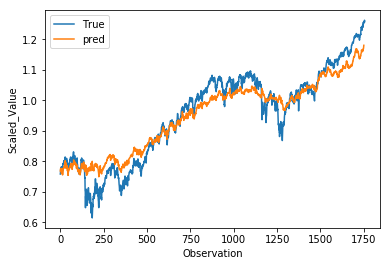

dict_keys(['loss', 'val_loss'])


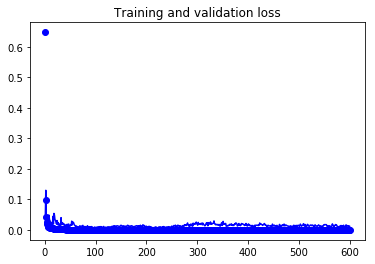

In [46]:
plot_model_architecture(model=model, file_name=file_name)
y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
             file_name=file_name,test_date=test_date)
save_train_csv(file_name=file_name)

In [47]:
#tcn8 tcn6~8 dila=32 dr=0.2~0.4
file_name='NYA_de5_clf4_pe1_tcn8'
#rerun

In [48]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
        activation='selu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.4, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=tf_stock_loss_6(vex_sign=vex_sign,cave_sign=cave_sign))
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model = model.fit(x=[X_tr_t,vex_sign_train,cave_sign_train], y=y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)




Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12544       input_7[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_12 (Activation)      (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
____________________________________________________________________________________________

Epoch 10/600
6808/6808==============================] - 5s 664us/sample - loss: 0.0088 - val_loss: 0.0884
Epoch 11/600
6808/6808==============================] - 5s 677us/sample - loss: 0.0071 - val_loss: 0.0644
Epoch 12/600
6808/6808==============================] - 5s 676us/sample - loss: 0.0071 - val_loss: 0.0596
Epoch 13/600
6808/6808==============================] - 5s 717us/sample - loss: 0.0067 - val_loss: 0.0413
Epoch 14/600
6808/6808==============================] - 5s 667us/sample - loss: 0.0068 - val_loss: 0.1504
Epoch 15/600
6808/6808==============================] - 5s 671us/sample - loss: 0.0061 - val_loss: 0.0524
Epoch 16/600
6808/6808==============================] - 5s 663us/sample - loss: 0.0054 - val_loss: 0.0332
Epoch 17/600
6808/6808==============================] - 5s 671us/sample - loss: 0.0050 - val_loss: 0.0581
Epoch 18/600
6808/6808==============================] - 5s 672us/sample - loss: 0.0048 - val_loss: 0.0707
Epoch 19/600
6808/6808========================

6808/6808==============================] - 9s 1ms/sample - loss: 2.9510e-04 - val_loss: 0.0092
Epoch 162/600
6808/6808==============================] - 9s 1ms/sample - loss: 2.8296e-04 - val_loss: 0.0130
Epoch 163/600
6808/6808==============================] - 9s 1ms/sample - loss: 2.6699e-04 - val_loss: 0.0093
Epoch 164/600
6808/6808==============================] - 9s 1ms/sample - loss: 2.7430e-04 - val_loss: 0.0125
Epoch 165/600
6808/6808==============================] - 9s 1ms/sample - loss: 2.8621e-04 - val_loss: 0.0119
Epoch 166/600
6808/6808==============================] - 9s 1ms/sample - loss: 2.7156e-04 - val_loss: 0.0114
Epoch 167/600
6808/6808==============================] - 9s 1ms/sample - loss: 2.8137e-04 - val_loss: 0.0137
Epoch 168/600
6808/6808==============================] - 9s 1ms/sample - loss: 2.7327e-04 - val_loss: 0.0147
Epoch 169/600
6808/6808==============================] - 9s 1ms/sample - loss: 2.9904e-04 - val_loss: 0.0136
Epoch 170/600
6808/6808==========

Epoch 309/600
6808/6808==============================] - 4s 652us/sample - loss: 1.8557e-04 - val_loss: 0.0085
Epoch 310/600
6808/6808==============================] - 4s 656us/sample - loss: 1.8721e-04 - val_loss: 0.0085
Epoch 311/600
6808/6808==============================] - 4s 652us/sample - loss: 1.6603e-04 - val_loss: 0.0111
Epoch 312/600
6808/6808==============================] - 4s 655us/sample - loss: 1.8504e-04 - val_loss: 0.0073
Epoch 313/600
6808/6808==============================] - 4s 652us/sample - loss: 1.8412e-04 - val_loss: 0.0078
Epoch 314/600
6808/6808==============================] - 4s 653us/sample - loss: 1.8001e-04 - val_loss: 0.0080
Epoch 315/600
6808/6808==============================] - 4s 653us/sample - loss: 1.7709e-04 - val_loss: 0.0078
Epoch 316/600
6808/6808==============================] - 4s 651us/sample - loss: 1.7937e-04 - val_loss: 0.0078
Epoch 317/600
6808/6808==============================] - 4s 656us/sample - loss: 1.7253e-04 - val_loss: 0.0050
E

6808/6808==============================] - 4s 627us/sample - loss: 1.5112e-04 - val_loss: 0.0105
Epoch 454/600
6808/6808==============================] - 4s 630us/sample - loss: 1.4680e-04 - val_loss: 0.0070 l - ETA: 0s - loss: 1
Epoch 455/600
6808/6808==============================] - 4s 630us/sample - loss: 1.5524e-04 - val_loss: 0.0089 2s - loss: 5.0374 - ETA: 2s - loss: 4.9130e-0 - ETA: 1s - loss: 4.8 
Epoch 456/600
6808/6808==============================] - 4s 626us/sample - loss: 1.4616e-04 - val_loss: 0.0075
Epoch 457/600
6808/6808==============================] - 4s 634us/sample - loss: 1.4861e-04 - val_loss: 0.0091
Epoch 458/600
6808/6808==============================] - 4s 629us/sample - loss: 1.4962e-04 - val_loss: 0.0086
Epoch 459/600
6808/6808==============================] - 4s 630us/sample - loss: 1.4707e-04 - val_loss: 0.0064
Epoch 460/600
6808/6808==============================] - 4s 630us/sample - loss: 1.5727e-04 - val_loss: 0.0097loss: 4.9 - ETA: 1
Epoch 461/600
680

6808/6808==============================] - 4s 630us/sample - loss: 1.3816e-04 - val_loss: 0.0092
Epoch 593/600
6808/6808==============================] - 4s 630us/sample - loss: 1.4020e-04 - val_loss: 0.0097
Epoch 594/600
6808/6808==============================] - 4s 630us/sample - loss: 1.5301e-04 - val_loss: 0.0078
Epoch 595/600
6808/6808==============================] - 4s 629us/sample - loss: 1.4927e-04 - val_loss: 0.0087
Epoch 596/600
6808/6808==============================] - 4s 628us/sample - loss: 1.5941e-04 - val_loss: 0.0067ETA: 1s
Epoch 597/600
6808/6808==============================] - 4s 630us/sample - loss: 1.3296e-04 - val_loss: 0.0095
Epoch 598/600
6808/6808==============================] - 4s 627us/sample - loss: 1.3484e-04 - val_loss: 0.0080
Epoch 599/600
6808/6808==============================] - 4s 629us/sample - loss: 1.3895e-04 - val_loss: 0.0082
Epoch 600/600
6808/6808==============================] - 4s 627us/sample - loss: 1.3952e-04 - val_loss: 0.0077


y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.737494
The Adjusted R2 score on the Test set is:	0.730


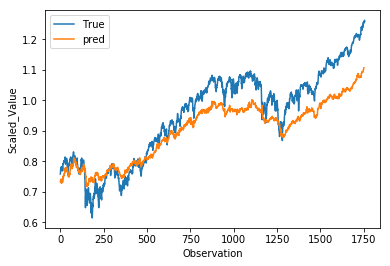

dict_keys(['loss', 'val_loss'])


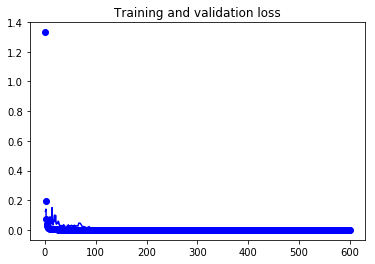

In [49]:
plot_model_architecture(model=model, file_name=file_name)
y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
             file_name=file_name,test_date=test_date)
save_train_csv(file_name=file_name)

# tcn9~11 change filter size

In [50]:
#tcn9
file_name='NYA_de5_clf4_pe1_tcn9'


In [51]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
output = TCN(nb_filters=128, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
        activation='selu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.2, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=tf_stock_loss_6(vex_sign=vex_sign,cave_sign=cave_sign))
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model = model.fit(x=[X_tr_t,vex_sign_train,cave_sign_train], y=y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)




Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 128)       6272        input_10[0][0]                   
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 128)       32896       tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_18 (Activation)      (None, 1, 128)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
____________________________________________________________________________________________

Epoch 10/600
6808/6808==============================] - 4s 616us/sample - loss: 0.0068 - val_loss: 0.0145
Epoch 11/600
6808/6808==============================] - 4s 616us/sample - loss: 0.0056 - val_loss: 0.0298
Epoch 12/600
6808/6808==============================] - 4s 615us/sample - loss: 0.0070 - val_loss: 0.0171
Epoch 13/600
6808/6808==============================] - 4s 618us/sample - loss: 0.0056 - val_loss: 0.0089
Epoch 14/600
6808/6808==============================] - 4s 614us/sample - loss: 0.0047 - val_loss: 0.0120
Epoch 15/600
6808/6808==============================] - 4s 612us/sample - loss: 0.0050 - val_loss: 0.0105
Epoch 16/600
6808/6808==============================] - 4s 603us/sample - loss: 0.0048 - val_loss: 0.0177
Epoch 17/600
6808/6808==============================] - 4s 603us/sample - loss: 0.0039 - val_loss: 0.0166
Epoch 18/600
6808/6808==============================] - 4s 602us/sample - loss: 0.0031 - val_loss: 0.0303
Epoch 19/600
6808/6808========================

Epoch 86/600
6808/6808==============================] - 4s 603us/sample - loss: 6.5604e-04 - val_loss: 0.0040
Epoch 87/600
6808/6808==============================] - 4s 604us/sample - loss: 6.3086e-04 - val_loss: 0.0031
Epoch 88/600
6808/6808==============================] - 4s 603us/sample - loss: 5.8698e-04 - val_loss: 0.0046
Epoch 89/600
6808/6808==============================] - 4s 605us/sample - loss: 6.5116e-04 - val_loss: 0.0045
Epoch 90/600
6808/6808==============================] - 4s 601us/sample - loss: 5.7916e-04 - val_loss: 0.0035
Epoch 91/600
6808/6808==============================] - 4s 603us/sample - loss: 6.9424e-04 - val_loss: 0.0044
Epoch 92/600
6808/6808==============================] - 4s 605us/sample - loss: 5.9556e-04 - val_loss: 0.0036
Epoch 93/600
6808/6808==============================] - 4s 604us/sample - loss: 6.7341e-04 - val_loss: 0.0030
Epoch 94/600
6808/6808==============================] - 4s 605us/sample - loss: 5.7219e-04 - val_loss: 0.0039
Epoch 95/6

6808/6808==============================] - 4s 605us/sample - loss: 2.2619e-04 - val_loss: 0.0044
Epoch 233/600
6808/6808==============================] - 4s 607us/sample - loss: 2.4657e-04 - val_loss: 0.0027
Epoch 234/600
6808/6808==============================] - 4s 603us/sample - loss: 2.0957e-04 - val_loss: 0.0038
Epoch 235/600
6808/6808==============================] - ETA: 0s - loss: 2.0405e-0 - 4s 604us/sample - loss: 2.0853e-04 - val_loss: 0.0050
Epoch 236/600
6808/6808==============================] - 4s 607us/sample - loss: 2.2097e-04 - val_loss: 0.0042
Epoch 237/600
6808/6808==============================] - 4s 607us/sample - loss: 2.4858e-04 - val_loss: 0.0022
Epoch 238/600
6808/6808==============================] - 4s 603us/sample - loss: 2.3474e-04 - val_loss: 0.0022
Epoch 239/600
6808/6808==============================] - 4s 603us/sample - loss: 2.3658e-04 - val_loss: 0.0029
Epoch 240/600
6808/6808==============================] - 4s 602us/sample - loss: 2.0306e-04 - val_

6808/6808==============================] - 4s 600us/sample - loss: 1.8734e-04 - val_loss: 0.0051
Epoch 379/600
6808/6808==============================] - 4s 604us/sample - loss: 1.9103e-04 - val_loss: 0.0044
Epoch 380/600
6808/6808==============================] - 4s 601us/sample - loss: 1.7655e-04 - val_loss: 0.0060
Epoch 381/600
6808/6808==============================] - 4s 600us/sample - loss: 1.7987e-04 - val_loss: 0.0055
Epoch 382/600
6808/6808==============================] - 4s 603us/sample - loss: 1.6452e-04 - val_loss: 0.0083
Epoch 383/600
6808/6808==============================] - 4s 601us/sample - loss: 1.8637e-04 - val_loss: 0.0036
Epoch 384/600
6808/6808==============================] - 4s 600us/sample - loss: 1.7377e-04 - val_loss: 0.0029
Epoch 385/600
6808/6808==============================] - 4s 602us/sample - loss: 1.6592e-04 - val_loss: 0.0043
Epoch 386/600
6808/6808==============================] - 4s 603us/sample - loss: 1.8858e-04 - val_loss: 0.0072
Epoch 387/600
6

6808/6808==============================] - 4s 601us/sample - loss: 1.4794e-04 - val_loss: 0.0046
Epoch 525/600
6808/6808==============================] - 4s 602us/sample - loss: 1.2757e-04 - val_loss: 0.0056
Epoch 526/600
6808/6808==============================] - 4s 602us/sample - loss: 1.2956e-04 - val_loss: 0.0080
Epoch 527/600
6808/6808==============================] - 4s 602us/sample - loss: 1.4771e-04 - val_loss: 0.0080
Epoch 528/600
6808/6808==============================] - 4s 603us/sample - loss: 1.5636e-04 - val_loss: 0.0067
Epoch 529/600
6808/6808==============================] - 4s 602us/sample - loss: 1.8901e-04 - val_loss: 0.0045
Epoch 530/600
6808/6808==============================] - 4s 604us/sample - loss: 1.6448e-04 - val_loss: 0.0023
Epoch 531/600
6808/6808==============================] - 4s 604us/sample - loss: 1.5467e-04 - val_loss: 0.0025
Epoch 532/600
6808/6808==============================] - 4s 599us/sample - loss: 1.6691e-04 - val_loss: 0.0021
Epoch 533/600
6

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.566509
The Adjusted R2 score on the Test set is:	0.554


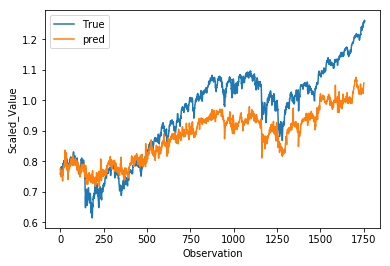

dict_keys(['loss', 'val_loss'])


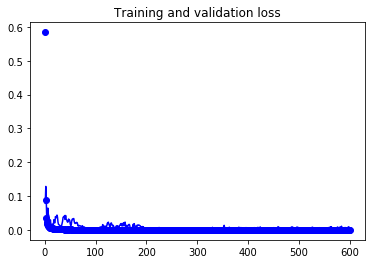

In [52]:
plot_model_architecture(model=model, file_name=file_name)
y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
             file_name=file_name,test_date=test_date)
save_train_csv(file_name=file_name)

In [53]:
#tcn10
file_name='NYA_de5_clf4_pe1_tcn10'
#rerun

In [54]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
        activation='selu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.2, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=tf_stock_loss_6(vex_sign=vex_sign,cave_sign=cave_sign))
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model = model.fit(x=[X_tr_t,vex_sign_train,cave_sign_train], y=y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)





Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12544       input_13[0][0]                   
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_24 (Activation)      (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
____________________________________________________________________________________________

Epoch 9/600
6808/6808==============================] - 4s 626us/sample - loss: 0.0092 - val_loss: 0.1067
Epoch 10/600
6808/6808==============================] - 4s 625us/sample - loss: 0.0083 - val_loss: 0.0650
Epoch 11/600
6808/6808==============================] - 4s 625us/sample - loss: 0.0064 - val_loss: 0.0684
Epoch 12/600
6808/6808==============================] - 4s 627us/sample - loss: 0.0058 - val_loss: 0.1020
Epoch 13/600
6808/6808==============================] - 4s 624us/sample - loss: 0.0069 - val_loss: 0.0981
Epoch 14/600
6808/6808==============================] - 4s 622us/sample - loss: 0.0065 - val_loss: 0.0851
Epoch 15/600
6808/6808==============================] - 4s 624us/sample - loss: 0.0057 - val_loss: 0.0726
Epoch 16/600
6808/6808==============================] - 4s 626us/sample - loss: 0.0053 - val_loss: 0.1314
Epoch 17/600
6808/6808==============================] - 4s 620us/sample - loss: 0.0066 - val_loss: 0.0795
Epoch 18/600
6808/6808=========================

6808/6808==============================] - 4s 622us/sample - loss: 5.8893e-04 - val_loss: 0.0233
Epoch 85/600
6808/6808==============================] - 4s 625us/sample - loss: 6.2670e-04 - val_loss: 0.0171
Epoch 86/600
6808/6808==============================] - 4s 624us/sample - loss: 4.9917e-04 - val_loss: 0.0171
Epoch 87/600
6808/6808==============================] - 4s 625us/sample - loss: 5.0434e-04 - val_loss: 0.0158
Epoch 88/600
6808/6808==============================] - 4s 623us/sample - loss: 5.1673e-04 - val_loss: 0.0149
Epoch 89/600
6808/6808==============================] - 4s 623us/sample - loss: 4.7878e-04 - val_loss: 0.0167
Epoch 90/600
6808/6808==============================] - 4s 626us/sample - loss: 5.8485e-04 - val_loss: 0.0157: 0s - loss: 5.8
Epoch 91/600
6808/6808==============================] - 4s 625us/sample - loss: 4.6254e-04 - val_loss: 0.0160 4.
Epoch 92/600
6808/6808==============================] - 4s 626us/sample - loss: 5.0512e-04 - val_loss: 0.0145
Epoc

6808/6808==============================] - 4s 625us/sample - loss: 2.2737e-04 - val_loss: 0.0204
Epoch 229/600
6808/6808==============================] - 4s 626us/sample - loss: 2.2386e-04 - val_loss: 0.0201
Epoch 230/600
6808/6808==============================] - 4s 626us/sample - loss: 2.1848e-04 - val_loss: 0.0270
Epoch 231/600
6808/6808==============================] - 4s 625us/sample - loss: 2.4832e-04 - val_loss: 0.0211
Epoch 232/600
6808/6808==============================] - 4s 623us/sample - loss: 2.1546e-04 - val_loss: 0.0211
Epoch 233/600
6808/6808==============================] - 4s 626us/sample - loss: 2.0938e-04 - val_loss: 0.0163
Epoch 234/600
6808/6808==============================] - 4s 624us/sample - loss: 2.0911e-04 - val_loss: 0.0212
Epoch 235/600
6808/6808==============================] - 4s 625us/sample - loss: 2.1281e-04 - val_loss: 0.0178
Epoch 236/600
6808/6808==============================] - 4s 629us/sample - loss: 2.0454e-04 - val_loss: 0.0182
Epoch 237/600
6

6808/6808==============================] - 4s 622us/sample - loss: 1.6591e-04 - val_loss: 0.0081
Epoch 374/600
6808/6808==============================] - 4s 626us/sample - loss: 1.6058e-04 - val_loss: 0.0064
Epoch 375/600
6808/6808==============================] - 4s 624us/sample - loss: 1.4904e-04 - val_loss: 0.0052
Epoch 376/600
6808/6808==============================] - 4s 620us/sample - loss: 1.6015e-04 - val_loss: 0.0052
Epoch 377/600
6808/6808==============================] - 4s 622us/sample - loss: 1.5724e-04 - val_loss: 0.0064
Epoch 378/600
6808/6808==============================] - 4s 624us/sample - loss: 1.4762e-04 - val_loss: 0.0064
Epoch 379/600
6808/6808==============================] - 4s 625us/sample - loss: 1.5018e-04 - val_loss: 0.0056
Epoch 380/600
6808/6808==============================] - 4s 624us/sample - loss: 1.6543e-04 - val_loss: 0.0049
Epoch 381/600
6808/6808==============================] - 4s 622us/sample - loss: 1.7238e-04 - val_loss: 0.0056
Epoch 382/600
6

6808/6808==============================] - 4s 621us/sample - loss: 1.3367e-04 - val_loss: 0.0102
Epoch 518/600
6808/6808==============================] - 4s 624us/sample - loss: 1.2941e-04 - val_loss: 0.0079
Epoch 519/600
6808/6808==============================] - 4s 624us/sample - loss: 1.1598e-04 - val_loss: 0.0075
Epoch 520/600
6808/6808==============================] - 4s 623us/sample - loss: 1.4024e-04 - val_loss: 0.0128
Epoch 521/600
6808/6808==============================] - 4s 626us/sample - loss: 1.4352e-04 - val_loss: 0.0118
Epoch 522/600
6808/6808==============================] - 4s 624us/sample - loss: 1.4037e-04 - val_loss: 0.0143
Epoch 523/600
6808/6808==============================] - 4s 625us/sample - loss: 1.3811e-04 - val_loss: 0.0120
Epoch 524/600
6808/6808==============================] - 4s 624us/sample - loss: 1.4055e-04 - val_loss: 0.0107
Epoch 525/600
6808/6808==============================] - 4s 623us/sample - loss: 1.3252e-04 - val_loss: 0.0090
Epoch 526/600
6

Epoch 591/600
6808/6808==============================] - 4s 626us/sample - loss: 1.4141e-04 - val_loss: 0.0076
Epoch 592/600
6808/6808==============================] - 4s 627us/sample - loss: 1.3856e-04 - val_loss: 0.0111
Epoch 593/600
6808/6808==============================] - 4s 624us/sample - loss: 1.3222e-04 - val_loss: 0.0057
Epoch 594/600
6808/6808==============================] - 4s 625us/sample - loss: 1.2883e-04 - val_loss: 0.0094
Epoch 595/600
6808/6808==============================] - 4s 624us/sample - loss: 1.4540e-04 - val_loss: 0.0055
Epoch 596/600
6808/6808==============================] - 4s 627us/sample - loss: 1.4023e-04 - val_loss: 0.0061
Epoch 597/600
6808/6808==============================] - 4s 623us/sample - loss: 1.4736e-04 - val_loss: 0.0051
Epoch 598/600
6808/6808==============================] - 4s 623us/sample - loss: 1.4556e-04 - val_loss: 0.0047
Epoch 599/600
6808/6808==============================] - 4s 621us/sample - loss: 1.3671e-04 - val_loss: 0.0058
E

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.905898
The Adjusted R2 score on the Test set is:	0.903


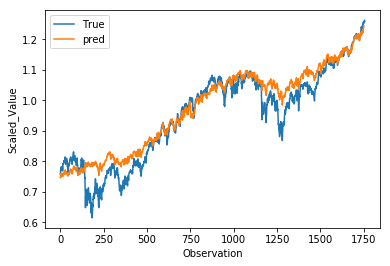

dict_keys(['loss', 'val_loss'])


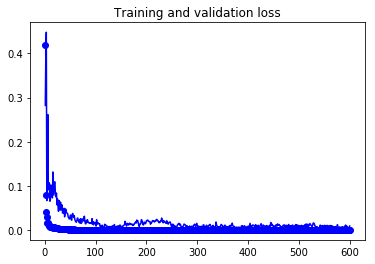

In [55]:
plot_model_architecture(model=model, file_name=file_name)
y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
             file_name=file_name,test_date=test_date)
save_train_csv(file_name=file_name)

In [56]:
#tcn11
file_name='NYA_de5_clf4_pe1_tcn11'
#rerun

In [57]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
output = TCN(nb_filters=512, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
        activation='selu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.2, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=tf_stock_loss_6(vex_sign=vex_sign,cave_sign=cave_sign))
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model = model.fit(x=[X_tr_t,vex_sign_train,cave_sign_train], y=y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)





Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 512)       25088       input_16[0][0]                   
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 512)       524800      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_30 (Activation)      (None, 1, 512)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
____________________________________________________________________________________________

6808/6808==============================] - 6s 813us/sample - loss: 5.5972e-04 - val_loss: 0.0256: 4s  - ET
Epoch 82/600
6808/6808==============================] - 6s 816us/sample - loss: 5.2280e-04 - val_loss: 0.0252
Epoch 83/600
6808/6808==============================] - 6s 817us/sample - loss: 5.5354e-04 - val_loss: 0.0226A: 1s - loss: - ETA: 1
Epoch 84/600
6808/6808==============================] - 6s 813us/sample - loss: 5.4385e-04 - val_loss: 0.0268
Epoch 85/600
6808/6808==============================] - 6s 816us/sample - loss: 4.5974e-04 - val_loss: 0.0217 - ETA: 0s - lo
Epoch 86/600
6808/6808==============================] - 6s 818us/sample - loss: 5.0221e-04 - val_loss: 0.0206
Epoch 87/600
6808/6808==============================] - 6s 815us/sample - loss: 4.8151e-04 - val_loss: 0.0192A: 0s - loss: 
Epoch 88/600
6808/6808==============================] - 6s 815us/sample - loss: 4.2344e-04 - val_loss: 0.0174
Epoch 89/600
6808/6808==============================] - 6s 816us/sample 

Epoch 217/600
6808/6808==============================] - 6s 817us/sample - loss: 2.0299e-04 - val_loss: 0.0045
Epoch 218/600
6808/6808==============================] - 6s 817us/sample - loss: 1.9612e-04 - val_loss: 0.0041- ETA: 4s - loss: 8.8952 - ETA: 4s - loss: 7.1 - ETA: 4s - - ET - ETA: 0s - loss: 1.7
Epoch 219/600
6808/6808==============================] - 6s 818us/sample - loss: 1.9589e-04 - val_loss: 0.0031
Epoch 220/600
6808/6808==============================] - 6s 819us/sample - loss: 2.0622e-04 - val_loss: 0.0040
Epoch 221/600
6808/6808==============================] - 6s 819us/sample - loss: 2.0749e-04 - val_loss: 0.0046
Epoch 222/600
6808/6808==============================] - 6s 817us/sample - loss: 2.0010e-04 - val_loss: 0.0054oss: 1.81
Epoch 223/600
6808/6808==============================] - 6s 819us/sample - loss: 2.1230e-04 - val_loss: 0.0025
Epoch 224/600
6808/6808==============================] - 6s 818us/sample - loss: 2.0300e-04 - val_loss: 0.0041- ETA - ETA: 0s - l

6808/6808==============================] - 6s 816us/sample - loss: 1.8801e-04 - val_loss: 0.0051
Epoch 359/600
6808/6808==============================] - 6s 819us/sample - loss: 1.7647e-04 - val_loss: 0.0051- ETA:
Epoch 360/600
6808/6808==============================] - 6s 818us/sample - loss: 1.7477e-04 - val_loss: 0.0053
Epoch 361/600
6808/6808==============================] - 6s 816us/sample - loss: 1.7148e-04 - val_loss: 0.0065
Epoch 362/600
6808/6808==============================] - 6s 818us/sample - loss: 1.6880e-04 - val_loss: 0.0059
Epoch 363/600
6808/6808==============================] - ETA: 0s - loss: 1.7484e-0 - 6s 820us/sample - loss: 1.7519e-04 - val_loss: 0.0063
Epoch 364/600
6808/6808==============================] - 6s 817us/sample - loss: 1.8410e-04 - val_loss: 0.0066
Epoch 365/600
6808/6808==============================] - ETA: 0s - loss: 1.7462e-04- ETA: 4s - l - ETA: 3s - loss: 7.22 - ET - ETA: - ETA: 0s - - 6s 810us/sample - loss: 1.7585e-04 - val_loss: 0.0056
Epo

6808/6808==============================] - 6s 816us/sample - loss: 1.6086e-04 - val_loss: 0.0053
Epoch 495/600
6808/6808==============================] - 6s 817us/sample - loss: 1.6002e-04 - val_loss: 0.0055
Epoch 496/600
6808/6808==============================] - 6s 811us/sample - loss: 1.5154e-04 - val_loss: 0.0058 - loss: 1.1424e - ETA: 1s - loss: 1. - ETA: 0s - loss:
Epoch 497/600
6808/6808==============================] - 6s 816us/sample - loss: 1.6005e-04 - val_loss: 0.0058
Epoch 498/600
6808/6808==============================] - 6s 819us/sample - loss: 1.6735e-04 - val_loss: 0.0055
Epoch 499/600
6808/6808==============================] - 6s 818us/sample - loss: 1.5710e-04 - val_loss: 0.0073
Epoch 500/600
6808/6808==============================] - 6s 818us/sample - loss: 1.7084e-04 - val_loss: 0.0061
Epoch 501/600
6808/6808==============================] - 6s 814us/sample - loss: 1.6938e-04 - val_loss: 0.0061: 0s - lo
Epoch 502/600
6808/6808==============================] - 6s 81

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.923124
The Adjusted R2 score on the Test set is:	0.921


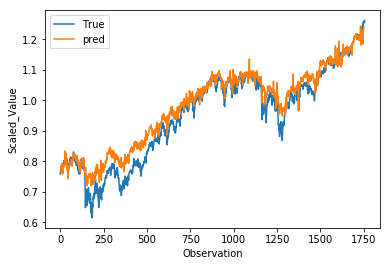

dict_keys(['loss', 'val_loss'])


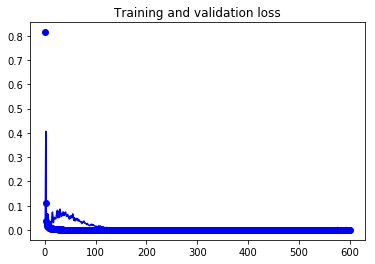

In [58]:
plot_model_architecture(model=model, file_name=file_name)
y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
             file_name=file_name,test_date=test_date)
save_train_csv(file_name=file_name)

# custom r2 score

In [45]:
def custom_r2_score(file_name):
    Target_DirPath = 'Deep-Learning-in-Python-master/'
    file_end_with = '_lr0001_dila16.csv'
    #above need to be adjust
    df_for_eval= pd.read_csv(Target_DirPath + file_name + file_end_with)
    df_for_eval['Date'] = pd.to_datetime(df_for_eval["Date"])
    df_for_eval = df_for_eval.set_index(["Date"], drop=True)

    y_pred_for_eval = df_for_eval["Close"]
    print(y_pred_for_eval.shape)
    ## create empty table with label fields
    y_pred_for_eval_data_like = np.zeros(shape=(len(y_pred_for_eval), X_train.shape[1]))
    ## put the predicted values in the right field
    y_pred_for_eval_data_like[:,0] = y_pred_for_eval[:]
    ## transform and then select the right field
    y_pred_for_eval_data = sc.transform(y_pred_for_eval_data_like)[:,0]

    r2_test = r2_score(y_test, y_pred_for_eval_data)
    print("The Adjusted R2 score on the Test set is:\t{:0.3f}"\
              .format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

    y_test_diff = np.diff(y_test) #y_test[i]與y_test[i-1]差異
    y_pred_for_eval_data_diff = np.diff(y_pred_for_eval_data)#y_pred[i]與y_pred[i-1]差異
    rsquare_product = y_test_diff*y_pred_for_eval_data_diff #兩者相乘
    def return_same_sign_bool(d):
        d = np.array(d)
        return np.where(d > 0, 1, 0)
    rsquare_product_bool = return_same_sign_bool(rsquare_product) #如果兩者相乘為正數回傳1，非正數回傳0
    print("The Custom  sign score on the Test set is:\t{:0.3f}"\
              .format((int(sum(rsquare_product_bool)) / len(rsquare_product_bool)))) 
               #計算y_test及y_pred變動同向機率
    print("The Custom  R2 score on the Test set is:\t{:0.3f}"\
              .format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])/2 
                      + ((int(sum(rsquare_product_bool)) / len(rsquare_product_bool)))/2 ))


In [48]:
for iter_number in range(6,12):
    iter_number = str(iter_number)
    file_name='NYA_de5_clf4_pe1_tcn'+iter_number
    print(file_name+":")
    custom_r2_score(file_name)

NYA_de5_clf4_pe1_tcn6:
(1756,)
The Adjusted R2 score on the Test set is:	0.899
The Custom  sign score on the Test set is:	0.491
The Custom  R2 score on the Test set is:	0.695
NYA_de5_clf4_pe1_tcn7:
(1756,)
The Adjusted R2 score on the Test set is:	0.904
The Custom  sign score on the Test set is:	0.487
The Custom  R2 score on the Test set is:	0.696
NYA_de5_clf4_pe1_tcn8:
(1756,)
The Adjusted R2 score on the Test set is:	0.730
The Custom  sign score on the Test set is:	0.494
The Custom  R2 score on the Test set is:	0.612
NYA_de5_clf4_pe1_tcn9:
(1756,)
The Adjusted R2 score on the Test set is:	0.554
The Custom  sign score on the Test set is:	0.502
The Custom  R2 score on the Test set is:	0.528
NYA_de5_clf4_pe1_tcn10:
(1756,)
The Adjusted R2 score on the Test set is:	0.903
The Custom  sign score on the Test set is:	0.491
The Custom  R2 score on the Test set is:	0.697
NYA_de5_clf4_pe1_tcn11:
(1756,)
The Adjusted R2 score on the Test set is:	0.921
The Custom  sign score on the Test set is:	0

In [52]:
x = np.array([0,10,1,2,50,30,10])
y_true = np.roll(x, -3)
y_pred = np.roll(x, -1)
(y_true -x)[:-3]
(y_pred-x)[:-3]

In [53]:
y_test_fivedayslater = np.roll(y_test, -5)
y_test_fivedayslater = 
y_pred_for_eval_data_diff = np.diff(y_pred_for_eval_data)
y_test_for_customr = test_sc_df.dropna().dropna()['Close']

array([ 2, 50, 30, 10,  0, 10,  1])

array([ 2, 40, 29,  8])

array([10, -9,  1, 48])